In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/Pytorch-Models

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models


In [2]:
!python --version

Python 3.12.11


In [ ]:
# --- Step 1: Install Python 3.11 in Colab ---
!sudo apt-get update -y
!sudo apt-get install -y python3.11 python3.11-distutils python3.11-venv

# --- Step 2: Make sure pip for 3.11 exists ---
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.11

# --- Step 3: Upgrade pip + wheel + setuptools (important for old packages) ---
!python3.11 -m pip install --upgrade pip setuptools wheel

# --- Step 4: Install your packages using Python 3.11 explicitly ---
!python3.11 -m pip install data-gradients==0.3.1 json-tricks==3.16.1 \
    "onnxruntime>=1.15.0" "onnxsim<1.0,>=0.4.3" \
    "pip-tools>=6.12.1" rapidfuzz stringcase==1.2.0 treelib==1.6.1

In [ ]:
# 1. Clone and install SuperGradients manually (latest from GitHub)
!git clone https://github.com/Deci-AI/super-gradients.git
%cd super-gradients

# CLEAN installation — no Sphinx, no doc tools
!python3.11 -m pip install -e . --no-deps
!python3.11 -m pip install hydra-core==1.3.2 torchmetrics==0.8.0 Deprecated==1.2.13 pyDeprecate==0.3.2
%cd ..

In [ ]:
# Install super-gradients & dependencies
!python3.11 -m pip install super-gradients

In [ ]:
!python3.11 -m pip install data-gradients==0.3.1 json-tricks==3.16.1 onnxruntime>=1.15.0 "onnxsim<1.0,>=0.4.3" pip-tools>=6.12.1 rapidfuzz stringcase==1.2.0 treelib==1.6.1

In [ ]:
!python3.11 -m pip show super-gradients

Name: super-gradients
Version: 3.7.1+master
Summary: SuperGradients
Home-page: https://docs.deci.ai/super-gradients/documentation/source/welcome.html
Author: Deci AI
Author-email: rnd@deci.ai
License: 
Location: /usr/local/lib/python3.11/dist-packages
Editable project location: /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/super-gradients
Requires: albumentations, boto3, data-gradients, Deprecated, einops, fonttools, hydra-core, imagesize, json-tricks, jsonschema, matplotlib, onnx, onnxruntime, onnxsim, packaging, pillow, pip-tools, psutil, pygments, rapidfuzz, scipy, setuptools, stringcase, tensorboard, termcolor, torch, torchmetrics, torchvision, tqdm, treelib, werkzeug, wheel
Required-by: 


In [ ]:
%cd super-gradients

/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/super-gradients


In [ ]:
import sys
sys.path.append('/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/super-gradients/src')

In [ ]:
import os
os.environ["NO_ALBUMENTATIONS_UPDATE"] = "1"

In [ ]:
print("hello")

hello


In [ ]:
import subprocess
import sys
from threading import Thread
from queue import Queue, Empty

class Py311Notebook:
    def __init__(self):
        # Start Python 3.11 in interactive mode
        self.proc = subprocess.Popen(
            ["python3.11", "-i"],
            stdin=subprocess.PIPE,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            bufsize=1
        )
        # Queues to read stdout/stderr asynchronously
        self.stdout_queue = Queue()
        self.stderr_queue = Queue()
        Thread(target=self._enqueue_output, args=(self.proc.stdout, self.stdout_queue), daemon=True).start()
        Thread(target=self._enqueue_output, args=(self.proc.stderr, self.stderr_queue), daemon=True).start()
        self.marker = "###END_OF_CELL###"

    def _enqueue_output(self, stream, queue):
        for line in iter(stream.readline, ''):
            queue.put(line)

    def run_cell(self, code: str, timeout=5):
        """
        Run Python 3.11 code as a notebook cell
        """
        # Append print marker
        code_to_run = f"{code}\nprint('{self.marker}')\n"
        self.proc.stdin.write(code_to_run)
        self.proc.stdin.flush()

        # Capture stdout until marker
        stdout_lines = []
        while True:
            try:
                line = self.stdout_queue.get(timeout=timeout)
                if self.marker in line:
                    break
                stdout_lines.append(line)
            except Empty:
                break
        stdout = "".join(stdout_lines)

        # Capture stderr
        stderr_lines = []
        while True:
            try:
                line = self.stderr_queue.get_nowait()
                stderr_lines.append(line)
            except Empty:
                break
        stderr = "".join(stderr_lines)

        # Display outputs in notebook
        if stdout:
            print(stdout, end='')
        if stderr:
            print(stderr, end='', file=sys.stderr)

        return {"stdout": stdout, "stderr": stderr}

    def close(self):
        self.proc.stdin.write("exit()\n")
        self.proc.stdin.flush()
        self.proc.terminate()

In [ ]:
# Start persistent Python 3.11
py311 = Py311Notebook()

# First cell: imports
py311.run_cell("""
import os
os.environ["MPLBACKEND"] = "agg"
from super_gradients.training import Trainer, models
from super_gradients.training.dataloaders.dataloaders import get_data_loader
from super_gradients.training.utils.distributed_training_utils import setup_device
print("Imported successfully!")
""")

Python 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.


{'stdout': '',
 'stderr': 'Python 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0] on linux\nType "help", "copyright", "credits" or "license" for more information.\n'}

In [ ]:
# Second cell: create objects
py311.run_cell("""
model = models.get("DDRNET_39", num_classes=19, checkpoint_path="/content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth")
print("2nd cell")
""")

>>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> [2025-08-23 19:58:26] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth EMA checkpoint.
>>> >>> >>> >>> >>> [2025-08-23 19:58:28] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth EMA checkpoint.
>>> >>> >>> >>> >>> [2025-08-23 19:58:30] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth EMA checkpoint.
>>> >>> >>> >>> >>> [2025-08-23 19:58:32] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth EMA checkpoint.


{'stdout': '',
 'stderr': '>>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> [2025-08-23 19:58:26] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth EMA checkpoint.\n>>> >>> >>> >>> >>> [2025-08-23 19:58:28] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth EMA checkpoint.\n>>> >>> >>> >>> >>> [2025-08-23 19:58:30] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth EMA checkpoint.\n>>> >>> >>> >>> >>> [2025-08-23 19:58:32] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/ddrnet_39_cityscapes.pth EMA checkpoint

In [ ]:
# Third cell: use objects
py311.run_cell("""
model.eval()
model.prep_model_for_conversion(input_size=[1, 3, 1024, 2048])
print("3rd cell")
""")

2nd cell


{'stdout': '2nd cell\n', 'stderr': ''}

In [ ]:
py311.run_cell("""
import torch

# Define a dummy input tensor with the expected shape (batch_size, channels, height, width)
# Assuming the model expects a batch size of 1, 3 channels (RGB), and a spatial size of 512x512
dummy_input = torch.randn(1, 3, 1024, 2048).cuda()

# Move the model to the GPU
model.cuda()

torch.onnx.export(model, dummy_input,  "ddrnet_39_cityscapes.onnx")
""")

In [ ]:
py311.run_cell("""

""")

In [ ]:
py311.run_cell("""

""")

In [ ]:
# When done
py311.close()

In [ ]:
!pip uninstall onnxruntime -y
!pip install onnxruntime-gpu

In [ ]:
import onnxruntime
import numpy as np
import cv2
import torch

# Load image and preprocess (assume 1024, 2048)
img_path = "/content/gdrive/MyDrive/Pytorch-Models/datasets/cityscapes-tests/cityscapes3.png"

img = cv2.imread(img_path)
img_resized = cv2.resize(img, (2048, 1024))
img_input = img_resized.astype(np.float32) / 255.0
img_input = img_input.transpose(2, 0, 1)[np.newaxis, :]  # (1, 3, H, W)

# Run inference
session = onnxruntime.InferenceSession("super-gradients/ddrnet_39_cityscapes.onnx", providers=["CUDAExecutionProvider"]) # super-gradients/
input_name = session.get_inputs()[0].name
outputs = session.run(None, {input_name: img_input})

# outputs is a list
print("Output:", [o.shape for o in outputs])

Output: [(1, 19, 1024, 2048)]


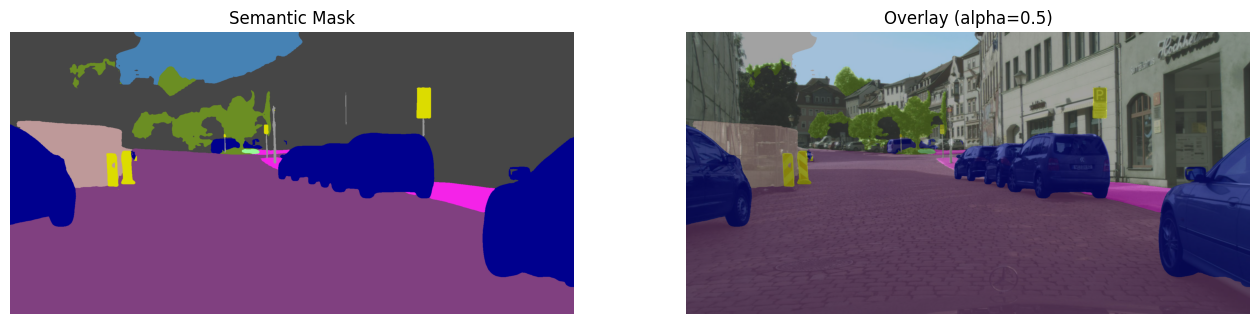

In [ ]:
import matplotlib.pyplot as plt

# Step 1: get per-pixel class (argmax over channel dimension)
logits = outputs[0]  # shape (1, 19, 1024, 2048)
pred = np.argmax(logits, axis=1)[0]  # shape (1024, 2048)

# Step 2: define a color palette (Cityscapes 19 colors)
# (example palette, you can customize)
cityscapes_colors = np.array([
    [128, 64,128], [244, 35,232], [70, 70, 70], [102,102,156], [190,153,153],
    [153,153,153], [250,170, 30], [220,220,  0], [107,142, 35], [152,251,152],
    [ 70,130,180], [220, 20, 60], [255,  0,  0], [  0,  0,142], [  0,  0, 70],
    [  0, 60,100], [  0, 80,100], [  0,  0,230], [119, 11, 32]
], dtype=np.uint8)

# Step 3: map prediction to colors
color_mask = cityscapes_colors[pred]

# Step 4: create overlay with alpha
alpha = 0.5  # adjust between 0 (only image) and 1 (only mask)
overlay = cv2.addWeighted(
    cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB),  # original image (RGB)
    1 - alpha,
    color_mask,
    alpha,
    0
)

# Step 5: visualize
plt.figure(figsize=(16, 16))

plt.subplot(1, 2, 1)
plt.title("Semantic Mask")
plt.imshow(color_mask)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Overlay (alpha={alpha})")
plt.imshow(overlay)
plt.axis("off")

plt.show()

In [6]:
import onnxruntime
import numpy as np
import cv2
import torch
import random
import os
import matplotlib.pyplot as plt

# Run inference
session = onnxruntime.InferenceSession("super-gradients/ddrnet_39_cityscapes.onnx", providers=["CUDAExecutionProvider"]) # super-gradients/
input_name = session.get_inputs()[0].name

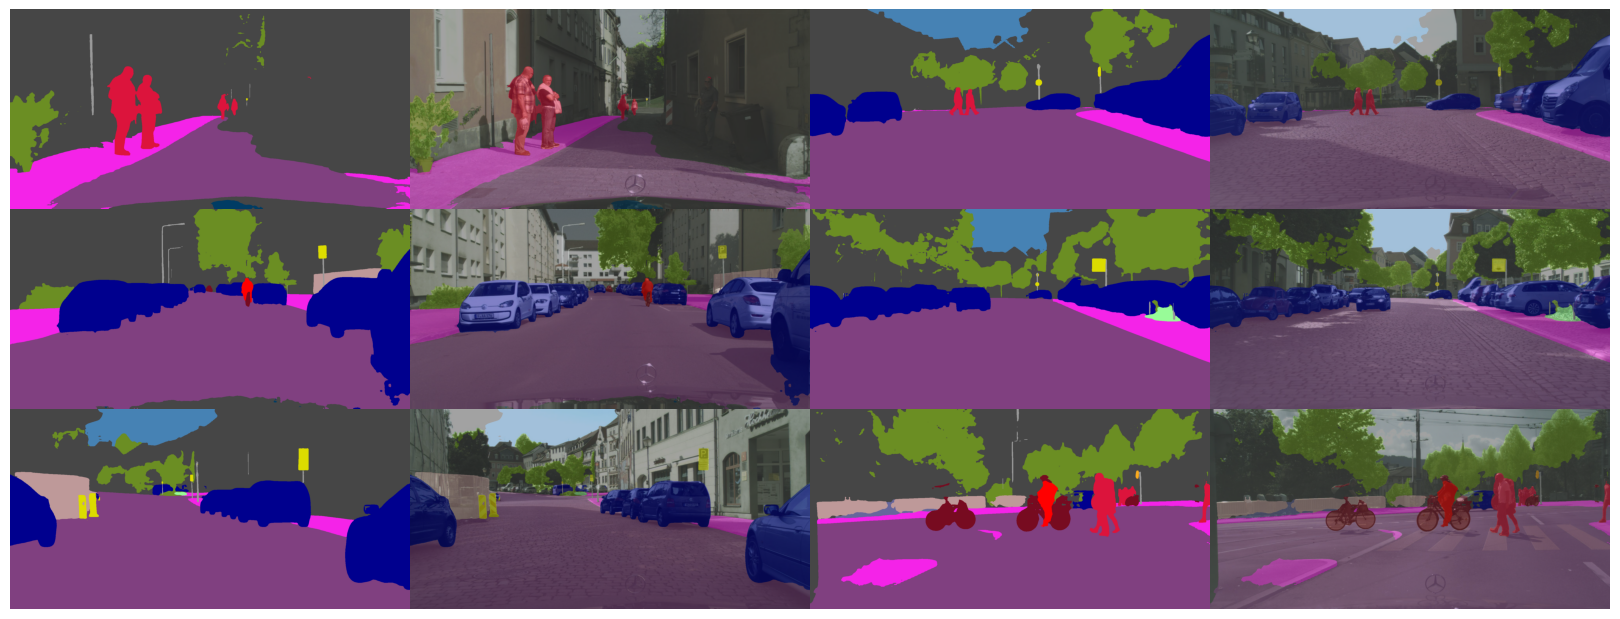

In [8]:
val_dir = "/content/gdrive/MyDrive/Pytorch-Models/datasets/cityscapes-tests/"
num_samples = 6

# --------------------------
# Collect images
# --------------------------
all_imgs = [f for f in os.listdir(val_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_imgs = random.sample(all_imgs, min(num_samples, len(all_imgs)))
img_paths = [os.path.join(val_dir, fname) for fname in selected_imgs]

cityscapes_colors = np.array([
    [128, 64,128], [244, 35,232], [70, 70, 70], [102,102,156], [190,153,153],
    [153,153,153], [250,170, 30], [220,220,  0], [107,142, 35], [152,251,152],
    [ 70,130,180], [220, 20, 60], [255,  0,  0], [  0,  0,142], [  0,  0, 70],
    [  0, 60,100], [  0, 80,100], [  0,  0,230], [119, 11, 32]
], dtype=np.uint8)

processed_imgs = []
img_sizes = []

for image_path in img_paths:
    # Load image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (2048, 1024))
    img_input = img_resized.astype(np.float32) / 255.0
    img_input = img_input.transpose(2, 0, 1)[np.newaxis, :]  # (1, 3, H, W)

    outputs = session.run(None, {input_name: img_input})

    logits = outputs[0]  # shape (1, 19, 1024, 2048)
    pred = np.argmax(logits, axis=1)[0]  # shape (1024, 2048)

    color_mask = cityscapes_colors[pred]

    alpha = 0.5  # adjust between 0 (only image) and 1 (only mask)
    overlay = cv2.addWeighted(
        cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB),  # original image (RGB)
        1 - alpha,
        color_mask,
        alpha,
        0
    )

    processed_imgs.append((color_mask, overlay))
    img_sizes.append(overlay.shape[:2])  # (height, width)

# --------------------------
# Prepare for grid plot
# --------------------------

cols = 4  # 2 images x 2 visuals = 4 subplots per row
rows = (len(processed_imgs) + 1) // 2  # 2 images per row

plt.figure(figsize=(4 * cols, 2 * rows))

# Target display size for each grid cell
target_height = 1024
target_width = 2048

for idx, (img1, img2) in enumerate(processed_imgs):
    for view_idx, view in enumerate([img1, img2]):
        h, w = view.shape[:2]

        # Scale keeping aspect ratio
        scale = min(target_width / w, target_height / h)
        new_w, new_h = int(w * scale), int(h * scale)
        resized = cv2.resize(view, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

        # Pad to target size
        top = (target_height - new_h) // 2
        bottom = target_height - new_h - top
        left = (target_width - new_w) // 2
        right = target_width - new_w - left
        padded = cv2.copyMakeBorder(resized, top, bottom, left, right,
                                    borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))

        plot_idx = idx * 2 + view_idx + 1
        plt.subplot(rows, cols, plot_idx)
        plt.imshow(padded)
        plt.axis('off')

plt.tight_layout(pad=0)           # removes padding around the whole figure
plt.subplots_adjust(wspace=0, hspace=0)  # removes spacing between cells
plt.show()